In [1]:
# 导入包
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# 显示汉字；设置中文编码和符号正常显示
#mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 读取数据
df = pd.read_csv('D:\\Python_lover\\weather\\2016_2017_weather_n.csv',encoding='gbk')

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


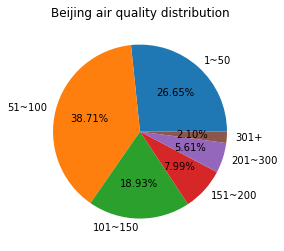

In [4]:
plt.axes(aspect='equal')
# 对因变量总体分析
a = df['zhishu']<= 50
b = df.loc[df['zhishu']>=51,'zhishu']
b = b<=100
c = df.loc[df['zhishu']>=101,'zhishu']
c = c<=150
d = df.loc[df['zhishu']>=151,'zhishu']
d = d<=200
e = df.loc[df['zhishu']>=201,'zhishu']
e = e<=300
f = df['zhishu']>=301
X = [sum(a),sum(b),sum(c),sum(d),sum(e),sum(f)]

plt.pie(X,labels=['1~50','51~100','101~150','151~200','201~300','301+']
        ,autopct='%1.2f%%',)
plt.title("Beijing air quality distribution")
plt.legend
plt.show()

质量指数在100以下属于空气质量较好占比为55.36%，也就意味这有接近一半的天气属于不易运动的天气

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """
e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


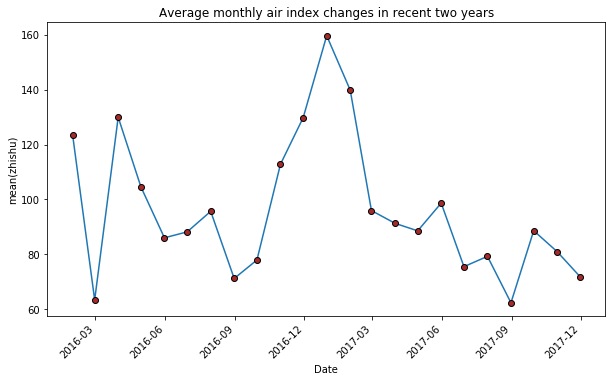

In [5]:

# 空气质量指数和时间的关系
dff = df.iloc[13:-1,]
dff.index = pd.to_datetime(dff['date'])
a = dff.resample('M', how='mean')
# 设置图框大小
fig = plt.figure(figsize=(10,6))
plt.plot(a.index, a['zhishu'],marker='o',markeredgecolor='black'# 点的颜色
         ,markerfacecolor='brown'# 点的填充色
         )
# 标签和坐标轴
plt.title('Average monthly air index changes in recent two years')
plt.xlabel('Date')
plt.ylabel('mean(zhishu)')
# 45度倾斜显示
fig.autofmt_xdate(rotation = 45)
plt.show()

由图可以看出，每个月的平均空气质量指数波动较大，但是最高点是在2016年的12月，
并且2016年的10、11、12月连续上升，考虑到主要原因可能和冬天的暖气供应造成整体空气较差。
但是2017年的10、11、12月空气质量指数总体在优良的水平，可能和这一年的十月十八号十八大召开和一系列整治政策相关，使得空气质量明显改善。

[120.3225806451613, 63.41379310344828, 129.93548387096774, 104.56666666666666, 86.03225806451613, 88.2, 95.6774193548387, 71.2258064516129, 77.96666666666667, 112.80645161290323, 129.8, 159.61290322580646]


e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


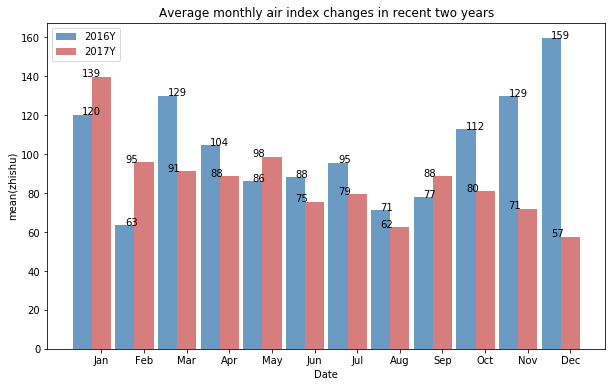

In [6]:
# 空气质量指数和时间的关系
dff = df
dff.index = pd.to_datetime(dff['date'])
# 构建数据
df_16 = dff['zhishu']['2016']
df_16 = df_16.resample('M').mean()
df_17 = dff['zhishu']['2017']
df_17 = df_17.resample('M').mean()
# 设置图框大小
fig = plt.figure(figsize=(10,6))
bar_width = 0.45
plt.bar(np.arange(12), df_16,label='2016Y',color='steelblue',alpha=0.8,width=bar_width)
plt.bar(np.arange(12)+bar_width, df_17,label='2017Y',color='indianred',alpha=0.8,width=bar_width)
# 标签和坐标轴
plt.title('Average monthly air index changes in recent two years')
plt.xlabel('Date')
plt.ylabel('mean(zhishu)')
# 添加刻度标签
plt.xticks(np.arange(12)+bar_width,['Jan','Feb','Mar','Apr','May','Jun' ,'Jul','Aug','Sep','Oct','Nov','Dec'])
# 为每一个条形图添加数值
print(df_16.tolist())
for x2016,y2016 in enumerate(df_16.tolist()):
    plt.text(x2016,y2016,'%d'%y2016)

for x2017,y2017 in enumerate(df_17.tolist()):
    plt.text(x2017,y2017,'%d'%y2017)
plt.legend()
plt.show()

上图表示的是2017年每月均值和2016年同期进行比较，
可以看出2017年每月空气质量指数的均值比2016年同期有所下降，这和一年来环境整治密切相关。
10、11、12月下降明显，十九大召开和大兴火灾事件后北京的规范居住环境应该有很大关系。

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


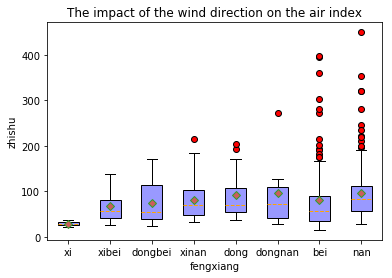

In [7]:
# 风向和空气质量指数的关系
dong = df.loc[df['dong']==1,'zhishu']
dongbei = df.loc[df['dongbei']==1,'zhishu']
dongnan = df.loc[df['dongnan']==1,'zhishu']
bei = df.loc[df['bei']==1,'zhishu']
nan = df.loc[df['nan']==1,'zhishu']
xi = df.loc[df['xi']==1,'zhishu']
xibei = df.loc[df['xibei']==1,'zhishu']
xinan = df.loc[df['xinan']==1,'zhishu']
plt.boxplot([xi,xibei,dongbei,xinan,dong,dongnan,bei,nan],patch_artist=True,boxprops={'color':'black','facecolor':'#9999ff'}
            ,showmeans=True,meanprops={'marker':'D','markerfacecolor':'indianred'} # 均值
            ,flierprops={'marker':'o','markerfacecolor':'red','color':'black'}# 异常点
            ,medianprops={'linestyle':'--','color':'orange'}# 中位数
            ,labels=['xi','xibei','dongbei','xinan','dong','dongnan','bei','nan'])
plt.xlabel('fengxiang')
plt.ylabel('zhishu')
plt.title('The impact of the wind direction on the air index')
plt.tick_params(top='off',right='off')
plt.show()

根据风向与空气质量指数数据画出箱线图如下：
由箱线图可以得出，风向对空气质量指数是有影响的。
各个风向天气平均水平都处于100以下，天气良好。
西风的时候样本量最少（只有五天是刮西风），但是空气最好。严重污染多出现在北风、南风时。
从北京市的工业总体布局上，东部南部和北部的工业较多，然而来自西面的风由于工业比较薄弱因而能够带来质量较好的空气。

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "upper ceter". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))
e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


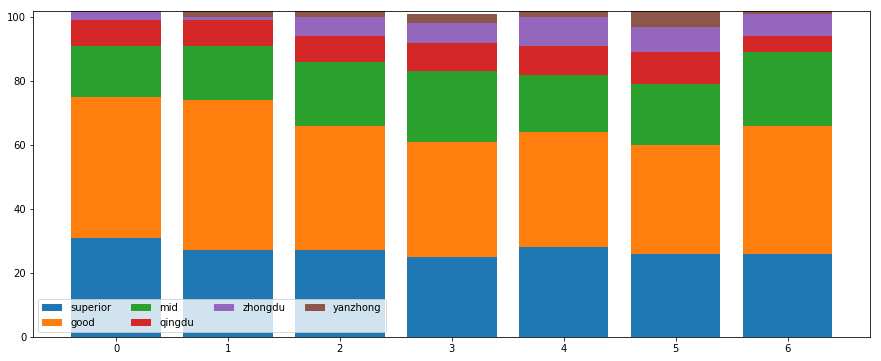

In [8]:
# 周几对与空气指数的关系
a = df.loc[df['Monday']==1, 'wuran']
b = df.loc[df['Tuesday']==1, 'wuran']
c = df.loc[df['Wednesday']==1, 'wuran']
d = df.loc[df['Thursday']==1, 'wuran']
e = df.loc[df['Friday']==1, 'wuran']
f = df.loc[df['Saturday']==1, 'wuran']
g = df.loc[df['Sunday']==1, 'wuran']
# 构造二元条形图的数据
superior = np.array([sum(a==1), sum(b==1),sum(c==1),sum(d==1),sum(e==1),sum(f==1),sum(g==1)])
good = np.array([sum(a==2), sum(b==2),sum(c==2),sum(d==2),sum(e==2),sum(f==2),sum(g==2)])
mid = np.array([sum(a==3), sum(b==3),sum(c==3),sum(d==3),sum(e==3),sum(f==3),sum(g==3)])
qingdu = np.array([sum(a==4), sum(b==4),sum(c==4),sum(d==4),sum(e==4),sum(f==4),sum(g==4)])
zhongdu = np.array([sum(a==5), sum(b==5),sum(c==5),sum(d==5),sum(e==5),sum(f==5),sum(g==5)])
zhongdudu = np.array([sum(a==6), sum(b==6),sum(c==6),sum(d==6),sum(e==6),sum(f==6),sum(g==6)])



#绘制垂直堆叠条形图
fig = plt.figure(figsize=(15,6))
plt.bar(np.arange(7),superior,label='superior', align='center')
plt.bar(np.arange(7),good,bottom = superior,label='good', align='center')
plt.bar(np.arange(7),mid,bottom = superior+good,label='mid', align='center')
plt.bar(np.arange(7),qingdu,bottom = superior+good+mid,label='qingdu', align='center')
plt.bar(np.arange(7),zhongdu,bottom = superior+good+mid+qingdu,label='zhongdu', align='center')
plt.bar(np.arange(7),zhongdudu,bottom = superior+good+mid+qingdu+zhongdu,label='yanzhong', align='center')
#plt.bar(np.arange(7),zhongdudud,bottom = superior+good+mid+qingdu+zhongdu+zhongdudu,label='yanzhong', align='center')
plt.legend(loc='upper ceter',ncol=4)
plt.show()


上图中表示2016年至2017年一周中每一天的空气污染程度的条形图，在过去两年周一几乎没有发生过严重污染天气，
周三、周五发生污染的可能性最大，周六发生严重污染的次数最多，应该大城市中人们周六最狂欢相关。
但是总体比例变化不大，说明市民日常生活对空气质量指数影响不大。

In [9]:
#天气和空气质量指数的关系,画出均值的曲线
qing = df.loc[df['qing']==1,'zhishu']
duoyun = df.loc[df['duoyun']==1,'zhishu']
yin = df.loc[df['yin']==1,'zhishu']
zhongyu = df.loc[df['zhongyu']==1,'zhishu']
xiaoyu = df.loc[df['xiaoyu']==1,'zhishu']
xiaodaozhong = df.loc[df['xiaodaozhong']==1,'zhishu']
wu = df.loc[df['wu']==1,'zhishu']
zhenyu = df.loc[df['zhenyu']==1,'zhishu']
leizhenyu = df.loc[df['leizhenyu']==1,'zhishu']
zhongdaoda = df.loc[df['zhongdaoda']==1,'zhishu']
dayu = df.loc[df['dayu']==1,'zhishu']
yansha = df.loc[df['yansha']==1,'zhishu']
xiaoxue = df.loc[df['xiaoxue']==1,'zhishu']
yujiaxue = df.loc[df['yujiaxue']==1,'zhishu']
mai = df.loc[df['mai']==1,'zhishu']
daxue = df.loc[df['daxue']==1,'zhishu']
baoyu = df.loc[df['baoyu']==1,'zhishu']
dadaobao = df.loc[df['dadaobao']==1,'zhishu']

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


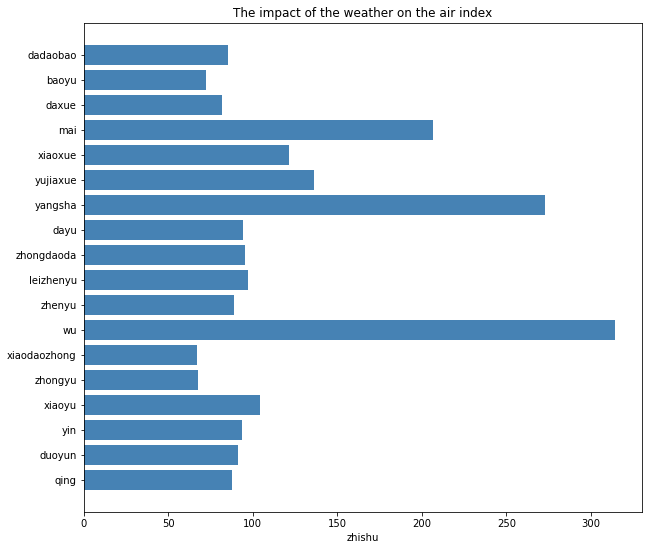

In [10]:
fig = plt.figure(figsize=(10,9))
plt.barh(range(18),[np.mean(qing), np.mean(duoyun), np.mean(yin), np.mean(xiaoyu), np.mean(zhongyu), np.mean(xiaodaozhong), np.mean(wu),
                   np.mean(zhenyu), np.mean(leizhenyu), np.mean(zhongdaoda), np.mean(dayu), np.mean(yansha), np.mean(yujiaxue),
                   np.mean(xiaoxue), np.mean(mai), np.mean(daxue), np.mean(baoyu), np.mean(dadaobao)],
        align='center', color='steelblue', alpha=1)
plt.yticks(range(18),[ 'qing', 'duoyun', 'yin', 'xiaoyu', 'zhongyu',
       'xiaodaozhong', 'wu', 'zhenyu', 'leizhenyu', 'zhongdaoda', 'dayu',
       'yangsha', 'yujiaxue', 'xiaoxue', 'mai', 'daxue', 'baoyu', 'dadaobao'])
plt.xlabel('zhishu')
plt.title('The impact of the weather on the air index')
plt.show()

上图中，表示的是天气状况和该天气状况下的空气质量指数平均值之间的关系，从上图可以看出，出现雾、霾、扬沙（只出现了一天可以删除）的天气，空气质量指数比其他天气下明显高出，当出现三种天气是一定要减少外出。当出现小到中雨、中雨、暴雨、大雪等雨雪天气时，平均空气质量指数会下降。但是总体上讲，北京市的空气质量指数属于良的居多，还有很大的改善空间。